In [1]:
from ThymeBoost import ThymeBoost as tb

Simple example with yahoo finance grabbing microsoft prices from yahoo finance api documentation. There are gaps in the index so we are just resetting the index to allow fitting. Better to fill gaps or do something else!

In [2]:
import yfinance as yf
msft = yf.Ticker("MSFT")

# get historical market data
hist = msft.history(period="max")

current_df = hist.iloc[-900:-100].reset_index()
future_df = hist.iloc[-100:].reset_index()

y_train = current_df['High']
X_train = current_df[['Volume', 'Stock Splits']]

y_test = future_df['High']
X_test = future_df[['Volume', 'Stock Splits']]

Just using volume and stock splits as two variables since it comes with the api call.

In [3]:
boosted_model = tb.ThymeBoost(verbose=0)
output = boosted_model.fit(y_train,
                           trend_estimator=['linear','ses'],
                           seasonal_estimator='fourier',
                           global_cost='mse',
                           exogenous_estimator='ols',
                           fit_type=['local', 'global'],
                            exogenous=X_train,
                           )
predicted_output = boosted_model.predict(output, 100, future_exogenous=X_test)

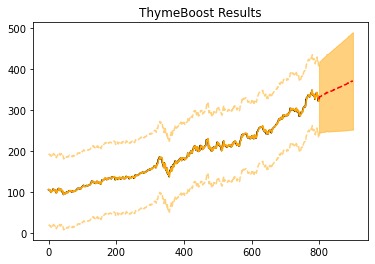

In [4]:
boosted_model.plot_results(output, predicted_output)

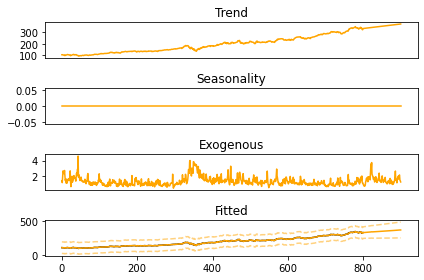

In [5]:
boosted_model.plot_components(output, predicted_output)

In [11]:
boosted_model = tb.ThymeBoost(verbose=0)
output = boosted_model.optimize(y_train,
                                trend_estimator=[['linear','ses'], 'linear'],
                                seasonal_estimator=['fourier'],
                                global_cost=['mse'],
                                exogenous_estimator=['ols', 'decision_tree'],
                                fit_type=[['local', 'global'], 'global'],
                                exogenous=[X_train, None],
                                optimization_strategy='rolling',
                                lag=32,
                                optimization_steps=8
                                )


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.40it/s]


Optimal model configuration: {'trend_estimator': ['linear', 'ses'], 'fit_type': 'global', 'seasonal_period': None, 'seasonal_estimator': 'fourier', 'global_cost': 'mse', 'exogenous_estimator': 'decision_tree', 'exogenous':        Volume  Stock Splits
0    32785500           0.0
1    26545600           0.0
2    43770400           0.0
3    63897800           0.0
4    61646800           0.0
..        ...           ...
795  35034800           0.0
796  47750300           0.0
797  28326500           0.0
798  24740600           0.0
799  24831500           0.0

[800 rows x 2 columns]}
Params ensembled: False


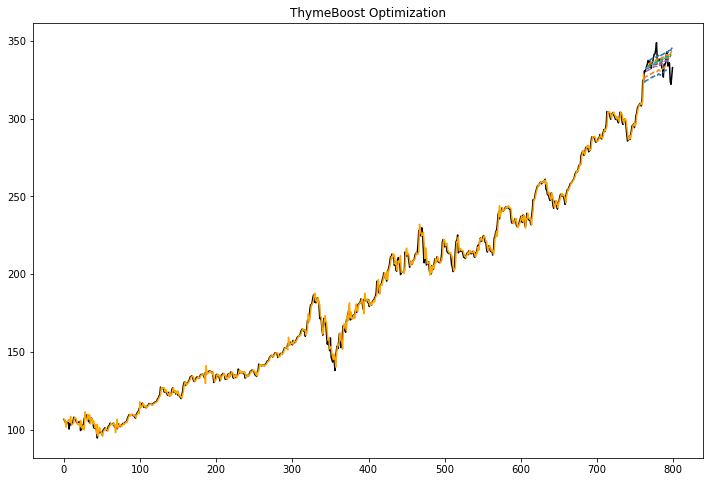

In [12]:
boosted_model.plot_optimization(output)

In [ ]:
predicted_output = boosted_model.predict(output, 100, future_exogenous=X_test)

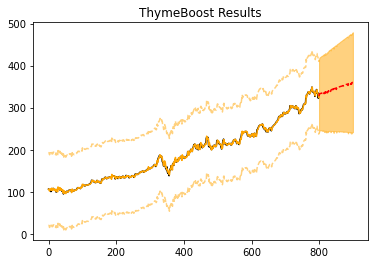

In [7]:
boosted_model.plot_results(output, predicted_output)